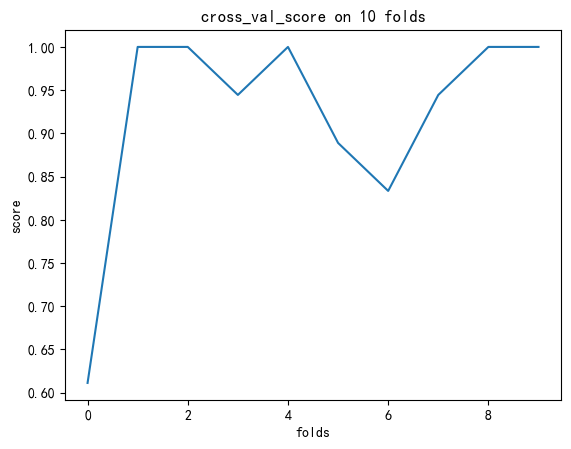

模型评分： 0.9222222222222222


In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection  import train_test_split
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification,load_wine
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification



plt.rcParams['font.family'] = 'SimHei'      # 中文正常显示
plt.rcParams['axes.unicode_minus'] = False  # 符号正常显示

# 加载数据集
data = load_wine()
frame = data.frame # 传入参数 as_frame=True 时才会返回
X = data.data
y = data.target
# 划分数据集，训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
feature_names = data.feature_names
target_names = data.target_names
clf_model = AdaBoostClassifier(random_state=10)
cross_ABC = cross_val_score(clf_model, X, y, cv=10, n_jobs=-1)

plt.plot(cross_ABC,label='ABC')
plt.title('cross_val_score on 10 folds')
plt.xlabel('folds')
plt.ylabel('score')
plt.show()

# 输出模型评分
print("模型评分：", cross_ABC.mean())

SAMME算法模型评分： 0.961111111111111


d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

SAMME.R算法模型评分： 0.9222222222222222


Text(0.5, 1.0, 'cross_val_score on 10 folds')

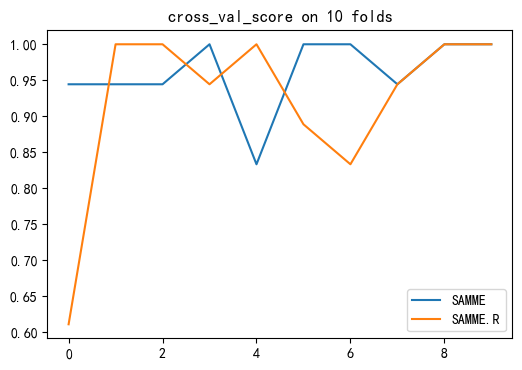

In [3]:
# 要调整模型性能，可以调整的参数有：
# 1. n_estimators：基分类器的数量
# 2. learning_rate：学习率
# 3. base_estimator：基分类器
# 4. algorithm：SAMME和SAMME.R ,默认为SAMME.R,指基分类器的权重计算方式
# 5. random_state：随机种子

# AdaBoost默认采用的是 SAMME.R算法，即基分类器为决策树，学习率为1，基分类器数量为50
# 建立AdaBoost分类模型（使用SAMME算法）
model_samme = AdaBoostClassifier(algorithm='SAMME',random_state=10)

# 使用交叉验证评估SAMME算法模型
scores_samme = cross_val_score(model_samme, X, y, cv=10)
print("SAMME算法模型评分：", scores_samme.mean())

# 建立AdaBoost分类模型（使用SAMME.R算法）
model_samme_r = AdaBoostClassifier(algorithm='SAMME.R',random_state=10)

# 使用交叉验证评估SAMME.R算法模型
scores_samme_r = cross_val_score(model_samme_r, X, y, cv=10)
print("SAMME.R算法模型评分：", scores_samme_r.mean())
# 从评分结果来看，SAMME算法的模型性能略优于SAMME.R算法的模型性能。
plt.figure(figsize=(6, 4))
plt.plot(scores_samme, label='SAMME')
plt.plot(scores_samme_r, label='SAMME.R')
plt.legend()
plt.title('cross_val_score on 10 folds')


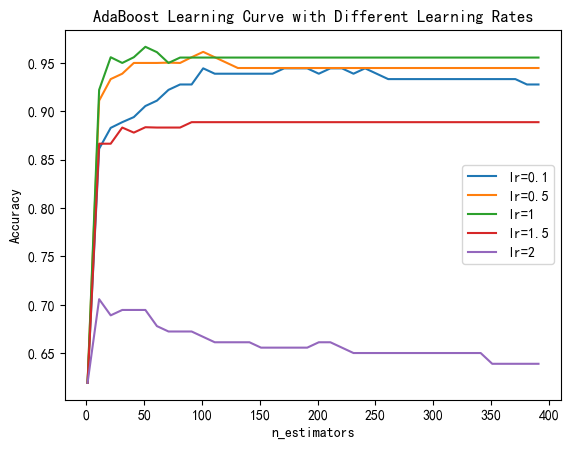

In [5]:
lr_list = [0.1, 0.5, 1, 1.5, 2]
val_curves = []
param_range = np.arange(1, 400, 10)
for lr in lr_list:
    clf = AdaBoostClassifier(learning_rate=lr,random_state=10,algorithm='SAMME')
    train_scores, val_scores = validation_curve(
        clf, X, y, param_name='n_estimators', scoring='accuracy',
        param_range=param_range, cv=10, n_jobs=-1       # n_jobs=-1表示使用所有的CPU核心
    )
    val_mean = np.mean(val_scores, axis=1)
    val_curves.append(val_mean)
    plt.plot(param_range, val_mean, label="lr={}".format(lr))

plt.legend(loc='best')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Learning Curve with Different Learning Rates')
plt.show()

In [6]:
# 通过上面的分析，选择学习率为0.5,选择n_estimators为50，选择SAMME算法
# 建立AdaBoost分类模型
model = AdaBoostClassifier(learning_rate=1, n_estimators=52, random_state=10,algorithm='SAMME')

# 使用交叉验证评估模型
ada_scores = cross_val_score(model, X, y, cv=10,n_jobs=-1)
print("交叉验证评估模型评分：", ada_scores.mean())
# plt.figure(figsize=(6, 4))
# plt.plot(ada_scores, label='SAMME')
# plt.legend()
# plt.title('cross_val_score on 10 folds')



交叉验证评估模型评分： 0.9722222222222221


Model:  AdaBoost
Cross-Validation Score:  0.9722222222222221

Model:  DecisionTree
Cross-Validation Score:  0.8931372549019609

Model:  RandomForest
Cross-Validation Score:  0.9718954248366012



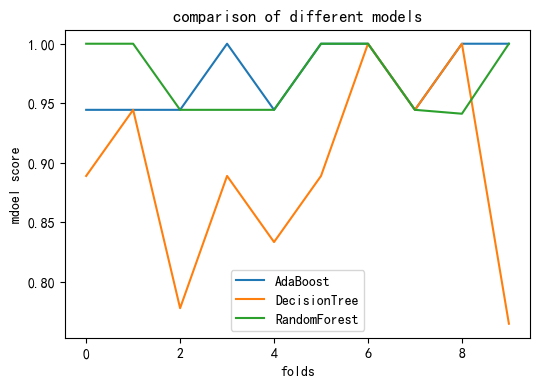

In [7]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 定义超参数网格
param_grid = {
    'AdaBoost':     {'n_estimators': [52], 'learning_rate': [1.0], 'algorithm': ['SAMME'], 'random_state': [10] },
    'DecisionTree': {'max_depth':    [1, 3, 5, 7, 9, 11], 'criterion': ['gini', 'entropy'], 'random_state': [10]},
    'RandomForest': {'n_estimators': [10, 50, 100, 150], 'max_depth': [1, 3, 5, 7, 9], 'random_state': [10]     }
}

# 交叉验证评估模型性能
results = {}
plt.figure(figsize=(6, 4))

for model_name, params in param_grid.items():
    if model_name == 'AdaBoost':
        model = AdaBoostClassifier() 
    elif model_name == 'DecisionTree':
        model = DecisionTreeClassifier()
    elif model_name == 'RandomForest':
        model = RandomForestClassifier()

    grid_search = GridSearchCV(model, params, cv=10,n_jobs=-1)
    scores = cross_val_score(grid_search, X, y, cv=10,n_jobs=-1)
    
    results[model_name] = scores.mean()
    plt.plot(scores, label=model_name)

# 打印结果
for model_name, score in results.items():
    print("Model: ", model_name)
    print("Cross-Validation Score: ", score)
    print()
plt.legend()
plt.title('comparison of different models')
plt.xlabel('folds')
plt.ylabel('mdoel score')
plt.show()

# AdaBoost模型在交叉验证集上表现最好，具有最高的平均交叉验证得分（0.9722）

# 随机森林模型（RandomForest）也表现出良好的性能，在交叉验证集上获得了高得分（0.9719）。随机森林是基于决策树的集成方法，它通过组合多个决策树的预测结果来提高模型的准确性。

# 决策树模型在交叉验证集上获得了较低的得分（0.8987），相对于AdaBoost和随机森林模型而言，其性能稍逊一筹。决策树模型可能在当前的超参数配置下过于简单，导致其准确性较低。

# 综上所述，根据交叉验证结果，AdaBoost模型在当前超参数配置下表现最好，随机森林模型紧随其后，而决策树模型的性能相对较差。
# 如果要选择一个模型进行葡萄酒数据集的分类任务，建议优先考虑AdaBoost或随机森林模型。然而，仍然建议进一步尝试不同的超参数配置，并进行更全面的模型评估，以确定最佳的模型配置。